# **Kütüphanlerin yüklenmesi**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

# **Train ve test verisinin çağrılması**

In [59]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test_x.csv")

# **Verinin analizi**

Veri setinde eksik veri varmı onun kontrolünü yapalım.

In [60]:
print("Do we have any missing data?", trainData.isna().sum())

Do we have any missing data? index                                         0
Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64


Eksik verimiz olmadığına göre 'Cinsiyet', 'Yaş Grubu', 'Medeni Durum' gibi **kategorik özelliklerin öbek grubuna göre grafikleri**ni çizdirelim.

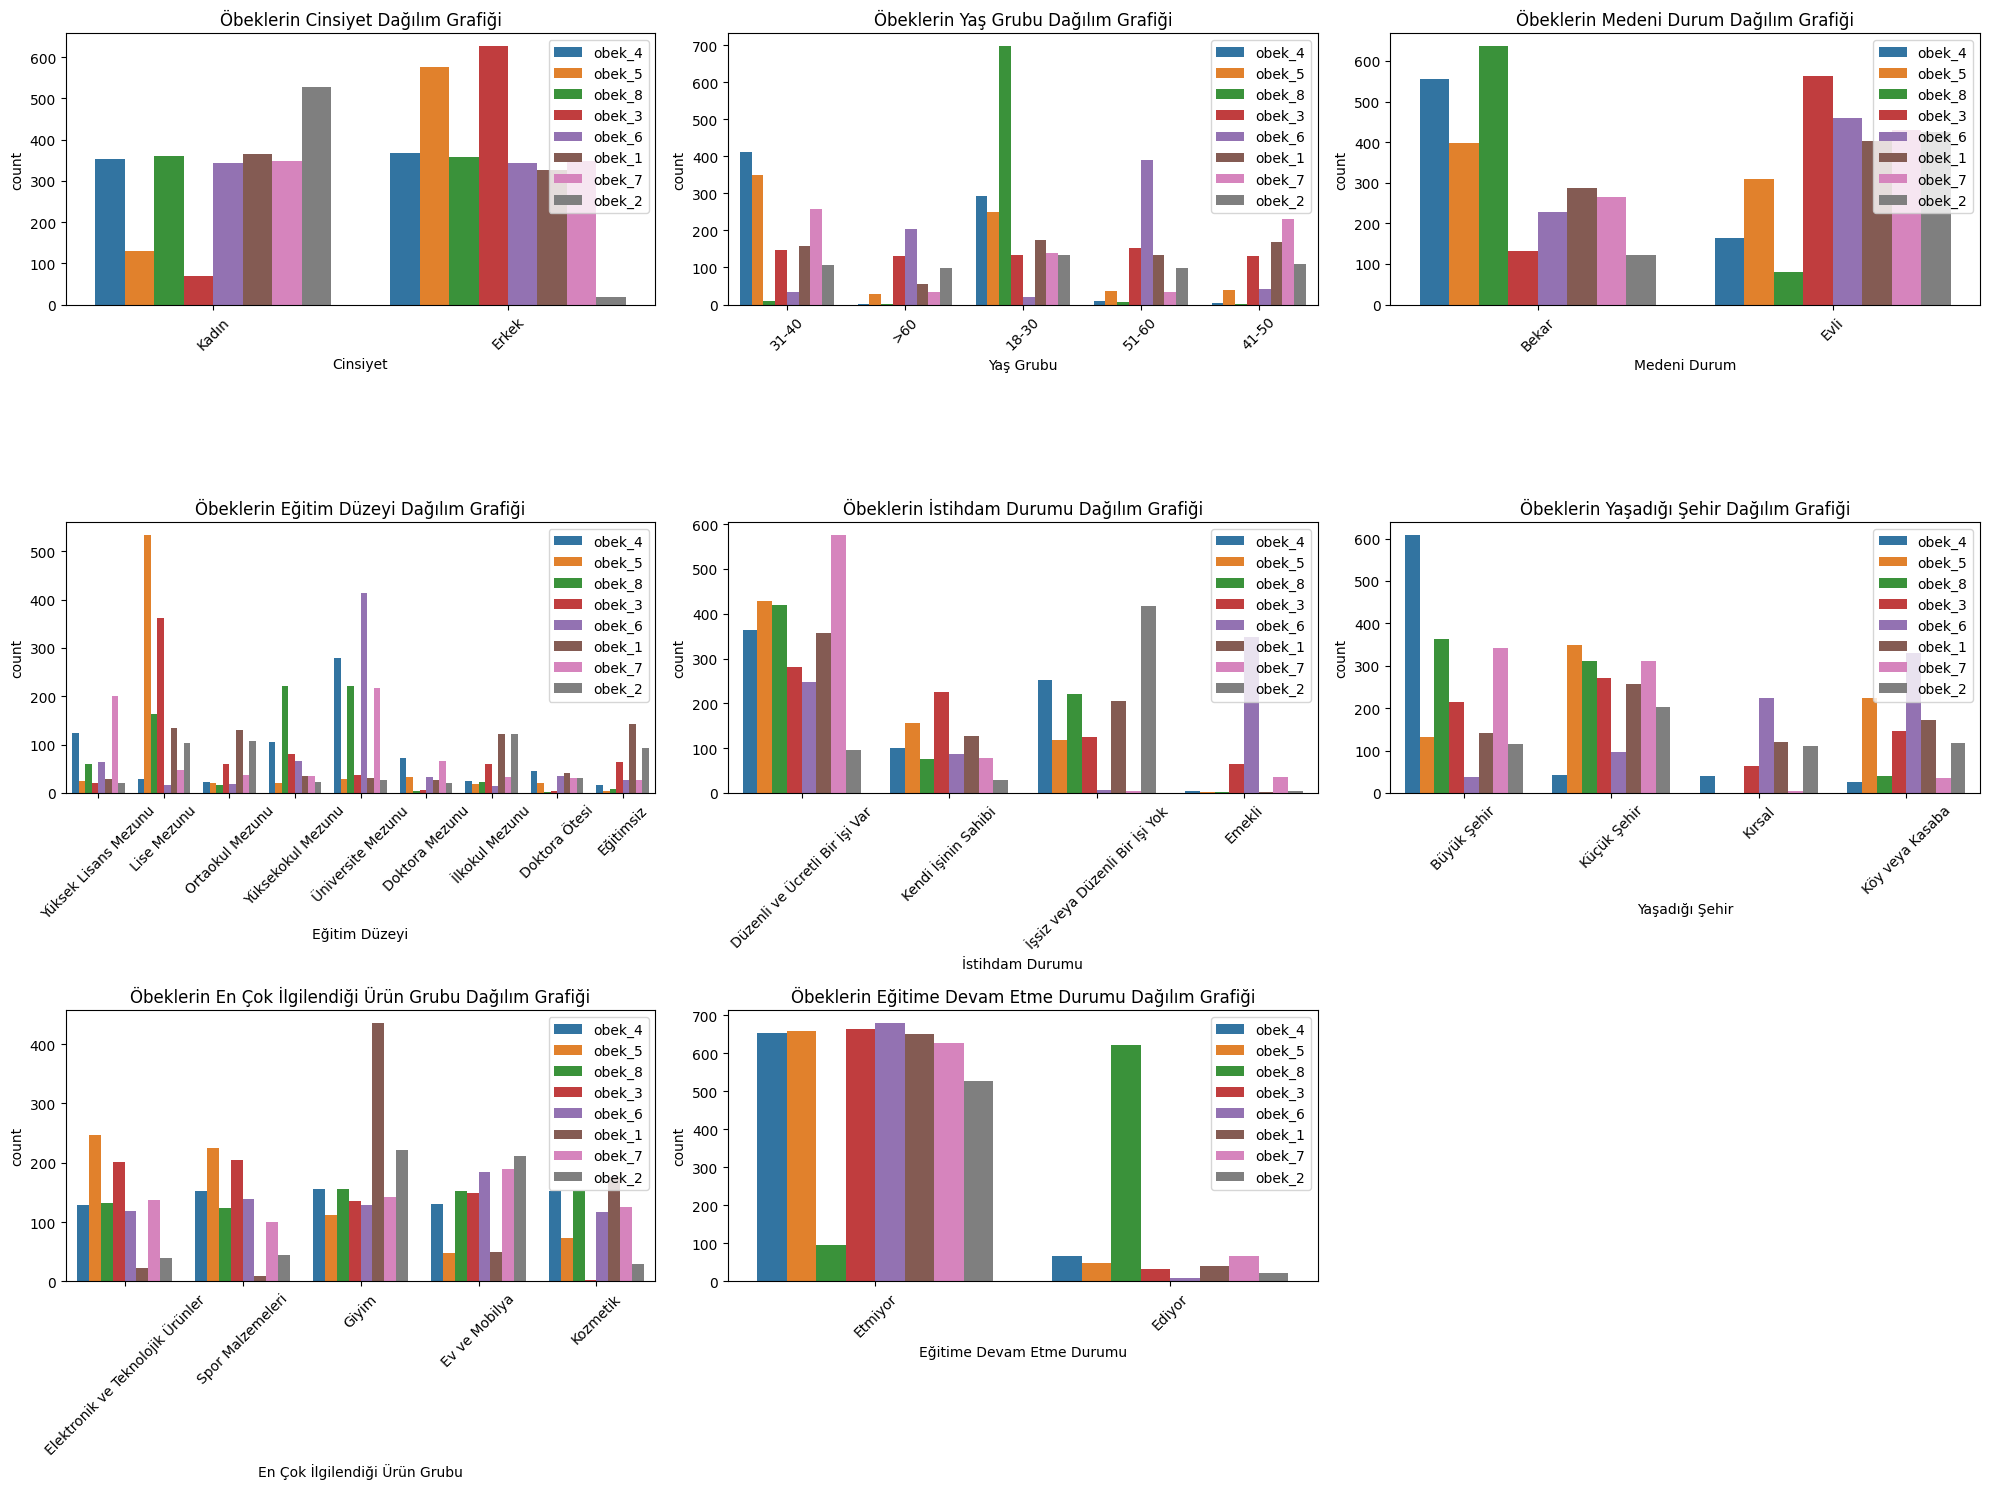

In [61]:
# Kategorik verilerin bulunduğu kolonları seçtik.
cFeatures = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']

# Öbek-Özellik grafiklerini çizdirelim.
plt.figure(figsize=(20, 15))
for index, feature in enumerate(cFeatures, 1):
    plt.subplot(3, 3, index)
    sns.countplot(data=trainData, x=feature, hue='Öbek İsmi')
    plt.title("Öbeklerin "+ feature + " Dağılım Grafiği")
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

'Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün adedi' gibi **sayısal özelliklerin öbek grubuna göre grafikleri**ni çizdirelim.

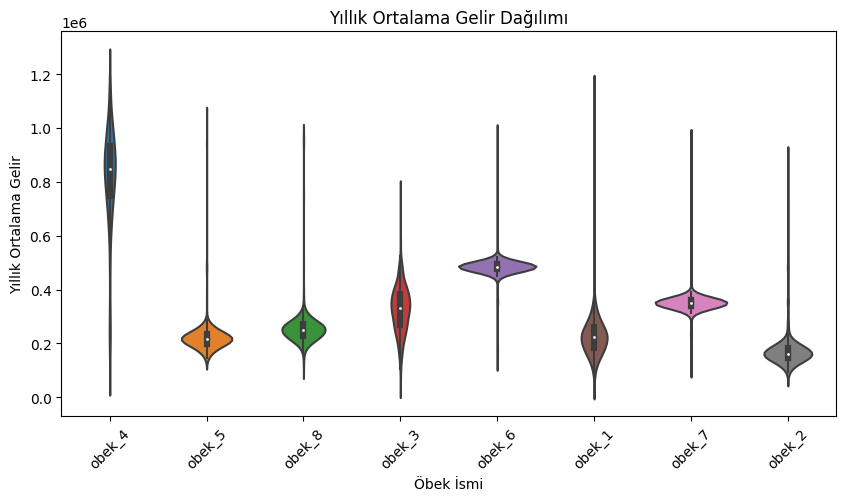

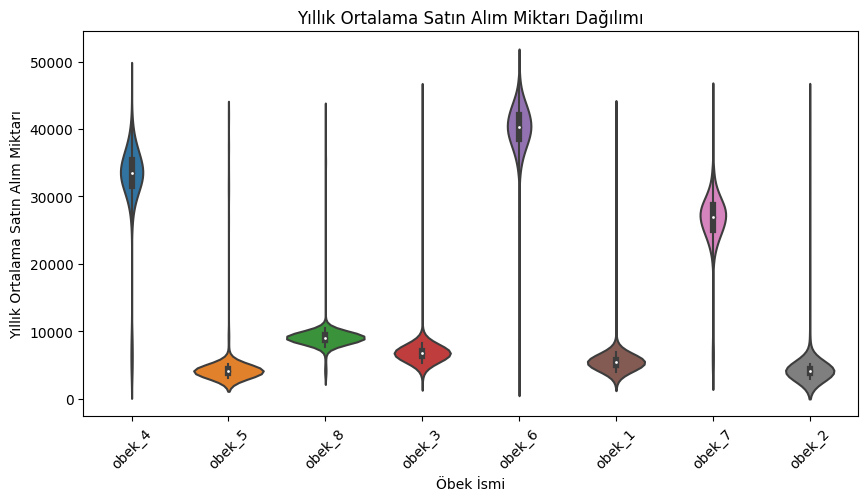

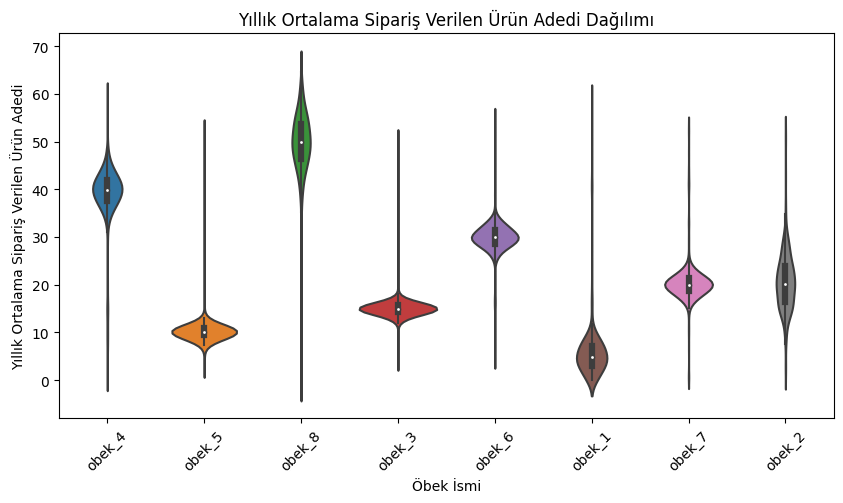

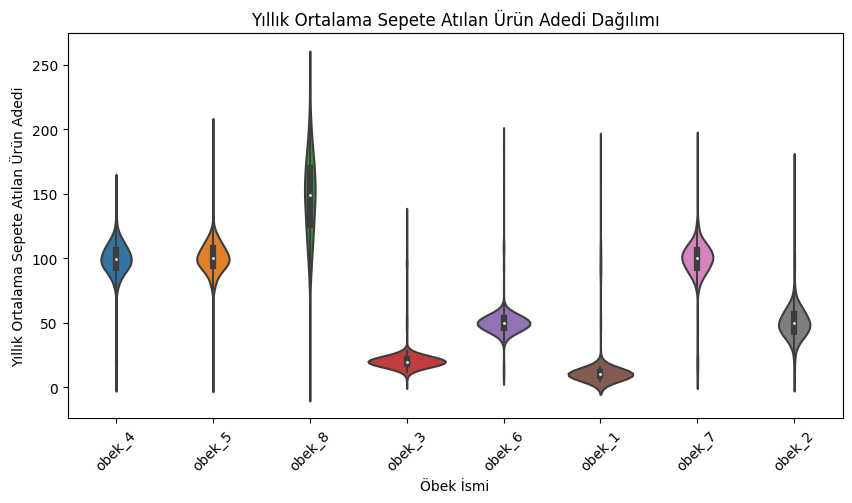

In [62]:
# Sayısal verilerin bulunduğu kolonları seçtik.
nFeatures = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Öbek-Özellik grafiklerini çizdirelim.
for featLikeaBeat in nFeatures:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Öbek İsmi', y=featLikeaBeat, data=trainData)
    plt.title(f'{featLikeaBeat} Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

**Öbek gruplarının incelenmesi**

**Öbek 1 (Dar gelirliler):** Kadın-Erkek, yaş grubu dağılımları eşit. Evli kişi sayısı bekar sayısından fazla. Lise, ortaokul, ilkokul mezunu veya eğitimsiz kişilerden oluşuyor. Çoğu düzenli bir işe sahip, emekli hiç yok. Küçük şehir başta olmak üzere her bölgede kalıyorlar. En çok giyimle daha sonra kozmetikle ilgileniyorlar. Eğitime devam etme durumları: Etmiyor. Yıllık ortalamaları: Gelir diğer gruplardan daha az 222000, satın alım miktarı 5350, sipariş verilen ürün adedi 5, sepete atılan ürün adedi 10.

**Öbek 2 (Ev hanımları):** 528 Kadın ve 19 erkekten oluşuyor. Her yaş grubuna eşit dağılım göstermişler. Çoğunluğu evli ve eğitimsiz, ilkokul, ortaokul veya lise mezunu. Çok azının düzenli bir işi var ve sadece bir kaçı emekli. Küçük şehir başta olmak üzere her bölgede kalıyorlar. Giyim, ev ve mobilya ile çok ilgililer. Neredeyse hepsi eğitime devam etmiyor. Yıllık Ortalamaları: En düşük gelire sahipler 162400, satın alım miktarı 4082, sipraiş verilen ürün adedi geniş bir dağılımı olsa da 20, sepete atılan ürün adedi 50.

**Öbek 3 (Esnaflar):** Neredeyse tamamı erkek ve her yaş grubundan eşit derecede bulunmakta. Çoğunluğu evli ve lise mezunu. Emekli sayısı az olsa da var ve çoğunluğu düzenli bir işe sahip. Kırsalda çok az ve şehirlerde çoğunlukla yaşama eğilimine sahip. Kozmetik dışındaki diğer tüm ürünlerle eşit derecede ilgileniyorlar. Eğitime devam eden sayısı neredeyse yok. Yıllık ortalamaları: Biraz yaygın bir dağılımı olsa a gelir 332000, satın alım miktarları 6760, sipariş verilen ürün adedi 15, sepete atılan ürün adedi 20.

**Öbek 4 (İnovatif Profesyoneller):** Kadın-Erkek dağılımı eşit. 18-40 yaş aralığından oluşuyor. Çoğunluğu bekar ve üniversite mezunu. Çoğunluğunun düzenli bir işi var ve büyük bir çoğunluğununda düzenli bir işi yok veya işsiz. Büyük şehirlerde kalıyorlar. Her ürün grubuna eşit ilgi duyuyorlar. Neredeyse tamamı eğitime devam etmiyor. Yıllık ortalamaları: En fazla kazanan grup ve *yaygın* bir grafiğe sahip gelirleri 849000, satın alımda ikinci sırada ve miktarı 33450, sipariş verilen ürün adedinde ikinci sırada ve 40, sepete atılan ürün adedi 100.

**Öbek 5 (Mavi Yakalılar):** Çoğunluk erkek ve 18-40 yaş aralığından oluşuyor. Bekar sayısı evli sayısından biraz fazla. Neredeyse tamamı lise mezunu. Çoğunluk düzenli bir işe sahip, emekli hiç yok. Küçük şehir ve kabalarda çoğunluk kalıyor, kırsalda kalan yok. En çok spor, elektronik ve teknolojik ürünlere ilgi duyuyorlar. Eğitime devam etme sayısı çok az. Yıllık ortalamaları: Öbek 2 den sonra en düşük gelire sahipler ve bu 21660, satın alım miktarı 4065, sipariş verilen ürün adedi 10, sepete atılan ürün adedi 100.

**Öbek 6 (Emekli Memurlar):** Kadın-Erkek dağılımı eşit. Çoğunluk 50 yaş ve üstünden oluşuyor. Evli sayısı bekar sayısından fazla. Neredeyse tamamı üniversite mezunu. Emekliler veya düzenli bir işe sahipler. Köy, kasaba ve kırsal kesimde yaşıyorlar. Her ürün grubuna eşit derecede ilgi duyuyorlar. Eğitime devam etme durumları: Etmiyor.
Yıllık ortalamaları: En yüksek ikinci gelire sahipler 485000, satın alım miktarında birinci sıradalar 40280, sipariş verilen ürün adedi 30, sepete atılan ürün adedi 50.

**Öbek 7 (Beyaz Yakalılar):** Kadın-Erkek dağılımı eşit. 31-50 yaş arasında bir dağılıma sahipler. Çoğunluğu evli. Üniversite ve yüksek lisans mezun sayısı bir hayli fazla. Düzenli ve ücretli bir işe sahipler. Şehirlerde yaşıyorlar. Ev ve mobilya en fazla olmak üzere her ürün grubuna neredeyse eşit ilgi duyuyorlar. Eğitime devam etmiyorlar. Yıllık ortalamaları: Gelir 350500, satın alım miktarı 27000, sipariş verilen ürün adedi 20, sepete atılan ürün adedi 100.

**Öbek 8 (Öğrenciler):** Kadın-Erkek dağılımı eşit. 18-30 yaş grubundan oluşuyor. Neredeyse tamamı bekar. Lise, üniversite veya yüksekokul mezunundan oluşuyorlar. Çoğunluk düzenli bir işe sahip. Şehirlerde yaşıyorlar. Her ürün grubuna eşit ilgi duyuyorlar. Neredeyse hepsi Eğitime devam ediyor. Yıllık ortalamaları: Gelir 252000, satın alım miktarı 9023, en çok sipariş verilen ürün adedine sahipler 50, sepete atılan ürümn adedi sayısı çok geniş bir skalaya sahip olsada 149.

# **Verilerin işlenmesi**

"Öbek İsmi" kolonunun değerlerini modelimizin optimizasyonu için sayısal değerlere çeviriyoruz.

In [63]:
trainData['Öbek İsmi'].replace('obek_1', 1, inplace=True)
trainData['Öbek İsmi'].replace('obek_2', 2, inplace=True)
trainData['Öbek İsmi'].replace('obek_3', 3, inplace=True)
trainData['Öbek İsmi'].replace('obek_4', 4, inplace=True)
trainData['Öbek İsmi'].replace('obek_5', 5, inplace=True)
trainData['Öbek İsmi'].replace('obek_6', 6, inplace=True)
trainData['Öbek İsmi'].replace('obek_7', 7, inplace=True)
trainData['Öbek İsmi'].replace('obek_8', 8, inplace=True)

x ve y değerlerini ayırıyoruz.

In [64]:
x = trainData.drop(["index", "Öbek İsmi"], axis=1)
y = trainData["Öbek İsmi"]

Tahmin edilecek veriler ile eğitime girecek verileri **encode** ediyoruz.

In [65]:
# --Label Encoder--
# Bu kolonlar 2 farklı değer bulundurduğundan label encoder kullanıyoruz.
le = LabelEncoder()
x["Cinsiyet"] = le.fit_transform(x.Cinsiyet)
testData["Cinsiyet"] = le.transform(testData["Cinsiyet"])

x["Medeni Durum"] = le.fit_transform(x["Medeni Durum"])
testData["Medeni Durum"] = le.transform(testData["Medeni Durum"])

x["Eğitime Devam Etme Durumu"] = le.fit_transform(x["Eğitime Devam Etme Durumu"])
testData["Eğitime Devam Etme Durumu"] = le.transform(testData["Eğitime Devam Etme Durumu"])

In [66]:
# One Hot Encoder
# Bu kolonlar 2 den fazla değer bulundurduğundan modelimizin optimizasyonunu arttırmak için one hot encoder kullanıyoruz.
ohe = OneHotEncoder()

# x ve test verilerindeki kolonları yeni değişken oluşturarak encode ediyoruz ve kolonları düşürüyoruz (Daha sonra ekleyeceğiz).
yas = pd.DataFrame(ohe.fit_transform(x[["Yaş Grubu"]]).toarray())
yas = yas.drop(yas.columns[0], axis=1) # Bu kodun amacı modelimizi kukla verilerden arındırmak.
x = x.drop(["Yaş Grubu"], axis=1)

yas2 = pd.DataFrame(ohe.fit_transform(testData[["Yaş Grubu"]]).toarray())
yas2 = yas2.drop(yas2.columns[0], axis=1)
testData = testData.drop(["Yaş Grubu"], axis=1)


egitim = pd.DataFrame(ohe.fit_transform(x[["Eğitim Düzeyi"]]).toarray())
egitim = egitim.drop(egitim.columns[0], axis=1)
x = x.drop(["Eğitim Düzeyi"], axis=1)

egitim2 = pd.DataFrame(ohe.fit_transform(testData[["Eğitim Düzeyi"]]).toarray())
egitim2= egitim2.drop(egitim2.columns[0], axis=1)
testData = testData.drop(["Eğitim Düzeyi"], axis=1)


istihdam = pd.DataFrame(ohe.fit_transform(x[["İstihdam Durumu"]]).toarray())
istihdam = istihdam.drop(istihdam.columns[0], axis=1)
x = x.drop(["İstihdam Durumu"], axis=1)

istihdam2 = pd.DataFrame(ohe.fit_transform(testData[["İstihdam Durumu"]]).toarray())
istihdam2 = istihdam2.drop(istihdam2.columns[0], axis=1)
testData = testData.drop(["İstihdam Durumu"], axis=1)


sehir = pd.DataFrame(ohe.fit_transform(x[["Yaşadığı Şehir"]]).toarray())
sehir = sehir.drop(sehir.columns[0], axis=1)
x = x.drop(["Yaşadığı Şehir"], axis=1)

sehir2 = pd.DataFrame(ohe.fit_transform(testData[["Yaşadığı Şehir"]]).toarray())
sehir2 = sehir2.drop(sehir2.columns[0], axis=1)
testData = testData.drop(["Yaşadığı Şehir"], axis=1)


ilgi = pd.DataFrame(ohe.fit_transform(x[["En Çok İlgilendiği Ürün Grubu"]]).toarray())
ilgi = ilgi.drop(ilgi.columns[0], axis=1)
x = x.drop(["En Çok İlgilendiği Ürün Grubu"], axis=1)

ilgi2 = pd.DataFrame(ohe.fit_transform(testData[["En Çok İlgilendiği Ürün Grubu"]]).toarray())
ilgi2 = ilgi2.drop(ilgi2.columns[0], axis=1)
testData = testData.drop(["En Çok İlgilendiği Ürün Grubu"], axis=1)

# Düzenlediğimiz kolonları x verilerine tekrar ekliyoruz.
x = pd.concat([x, yas, egitim, istihdam, sehir, ilgi], axis=1)
testData = pd.concat([testData, yas2, egitim2, istihdam2, sehir2, ilgi2], axis=1)

# Oluşturduğumuz değişkenlere ihtiyacımız kalmadığından siliyoruz.
del yas, egitim, istihdam, sehir, ilgi, ohe, le, yas2, egitim2, istihdam2, sehir2, ilgi2


# **Verilerin ölçeklendirilmesi**

In [67]:
# Standart Scaler kullanarak verileri ortalamaya dayalı ölçekliyoruz.
sc30 = StandardScaler()
x = sc30.fit_transform(x.values)

id = testData["index"].values # İndex kolonunu kopyalıyoruz (Daha sonra tahmin verilerimize tekrar ekleyeceğiz).

testData = testData.drop(["index"], axis=1)
testData = sc30.transform(testData.values)

# **Modelin seçilmesi**

**Denediğim modeller**

*   **Logistic Regression**
*   **KNN**
*  **SCV**
*   **Naive Bayes**
*   **Decision Trees**
*   **Random Forest**



**Logistic Regression**

In [69]:
# Logistic Regression %94.79
logarKapa = LogisticRegression(random_state=0)

crosValS = cross_val_score(estimator=logarKapa, X=x, y=y.values, cv=5)

print("Doğruluk: %",crosValS.mean()*100)
print("Standart Sapma: %",crosValS.std()*100)

Doğruluk: % 94.79853479853479
Standart Sapma: % 0.8695294850160604


**KNN (K-Nearest Neighbors)**

In [74]:
# KNN %80.43
knn = KNeighborsClassifier()

crosValS = cross_val_score(estimator=knn, X=x, y=y.ravel(), cv=5)

print("Doğruluk: %",crosValS.mean()*100)
print("Standart Sapma: %",crosValS.std()*100)


Doğruluk: % 80.43956043956044
Standart Sapma: % 1.339127209555377


**SVC (Support Vector Classifier)**

In [75]:
# SVC %94.39
svc = SVC()

crosValS = cross_val_score(estimator=svc, X=x, y=y.ravel(), cv=5)

print("Doğruluk: %",crosValS.mean()*100)
print("Standart Sapma: %",crosValS.std()*100)

Doğruluk: % 94.3956043956044
Standart Sapma: % 0.7196660331277851


**Naive Bayes**

In [76]:
# Naive Bayes %91.77
gaus = GaussianNB()

crosValS = cross_val_score(estimator=gaus, X=x, y=y.ravel(), cv=5)

print("Doğruluk: %",crosValS.mean()*100)
print("Standart Sapma: %",crosValS.std()*100)

Doğruluk: % 91.77655677655679
Standart Sapma: % 1.2029495878148746


**Decision Trees**

In [78]:
# Decision Trees % 90.25
deci = DecisionTreeClassifier(criterion="entropy")

crosValS = cross_val_score(estimator=deci, X=x, y=y.ravel(), cv=5)

print("Doğruluk: %",crosValS.mean()*100)
print("Standart Sapma: %",crosValS.std()*100)

Doğruluk: % 90.47619047619048
Standart Sapma: % 0.7727114692208392


**Random Fores Classifier**

In [83]:
# Random Forest Classifier %95.47
kfc = RandomForestClassifier()

crosValS = cross_val_score(estimator=kfc, X=x, y=y.ravel(), cv=5)

print("Doğruluk: %",crosValS.mean()*100)
print("Standart Sapma: %",crosValS.std()*100)

Doğruluk: % 95.47619047619047
Standart Sapma: % 0.6719390596279919


Doğruluk oranları:
*  Random Forest %95.47
*  Logistic Regression %94.79
*  SVC %94.39
*  Naive Bayes %91.77
*  Decision Trees % 90.25
*  KNN %80.43

Olduğundan kullanmak üzere **Random Forest Classifier** algoritmasını seçtim.

# **Modelin optimum değerlerinin bulunması**

In [88]:
kfc = RandomForestClassifier()

# Denenecek parametrelerin olduğu değişken.
kova = {"criterion": ["gini", "entropy","log_loss"],
           "max_depth": [9, 10, 11],
           "n_estimators": range(20, 40)
           }

# Grid search algoritması ile parametrelerin denendiği kısım.
predict_data_cv = GridSearchCV(kfc, kova, cv=5, n_jobs=-1, verbose=True).fit(x, y.values)

print(predict_data_cv.best_score_, predict_data_cv.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
0.9549450549450549 {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 34}


# **Modelin eğitilmesi ve tahmin değerlerinin oluşturulması**

In [89]:
# Optimize edilmiş model
kfc = RandomForestClassifier(criterion="gini", max_depth=9, n_estimators=34)
kfc.fit(x, y.ravel())

# Tahmin verilerini oluşturduk.
ypred = kfc.predict(testData)
ypred = pd.DataFrame(data=ypred, columns=["Öbek İsmi"])

# Öbek isimlerini modelimizin daha iyi tahmin yapabilmesi için sayısal
# değerler ile değiştirmiştik. Şimdi işlemi geri alıyoruz.
ypred['Öbek İsmi'].replace(1, "obek_1", inplace=True)
ypred['Öbek İsmi'].replace(2, 'obek_2', inplace=True)
ypred['Öbek İsmi'].replace(3, "obek_3", inplace=True)
ypred['Öbek İsmi'].replace(4, "obek_4", inplace=True)
ypred['Öbek İsmi'].replace(5, "obek_5", inplace=True)
ypred['Öbek İsmi'].replace(6, "obek_6", inplace=True)
ypred['Öbek İsmi'].replace(7, "obek_7", inplace=True)
ypred['Öbek İsmi'].replace(8, "obek_8", inplace=True)

# Ayırdığımız index kolonunu id olarak değiştirip tahmin değerlerine ekliyoruz
# ve submission.csv olarak tahminlerimizi kaydediyoruz.
ypred.insert(0, "id", id)
ypred.to_csv("submission.csv", index=False)

# **Deneysel kısım**

Diğer algoritmalardan birkaçının ne kadar doğru sonuç vereceğini görmek için projeden bağımsız optimize etmeyi denedim ve bulduğum sonuçlar:

* KNN %89.48 --knn = KNeighborsClassifier(leaf_size= 28, metric = "cityblock", n_neighbors= 21, weights= "distance")

* SVC %95.25 --svc = SVC(kernel="poly", C=7, degree=1)